# Monitoring of CO2 emissions from passenger cars, 2023 - Final
[2023 Dataset](https://www.eea.europa.eu/en/datahub/datahubitem-view/fa8b1229-3db6-495d-b18e-9c9b3267c02b?activeAccordion=)

|Name|Definition|Datatype|Cardinality|Relevance Comment|
|---|---|---|---|---|
|ID|Identification number.|integer|1..1|mapping/identification only|
|MS|Member state.|varchar(2)|0..1|only indirect influence?|
|Mp|Manufacturer pooling.|varchar(50)|0..1|mapping/identification only|
|VFN|Vehicle family identification number.|varchar(25)|0..1|mapping/identification only|
|Mh|Manufacturer name EU standard denomination .|varchar(50)|0..1|mapping/identification only|
|Man|Manufacturer name OEM declaration.|varchar(50)|0..1|mapping/identification only|
|MMS|Manufacturer name MS registry denomination .|varchar(125)|0..1|mapping/identification only|
|TAN|Type approval number.|varchar(50)|0..1|mapping/identification only|
|T|Type.|varchar(25)|0..1|mapping/identification only|
|Va|Variant.|varchar(25)|0..1|mapping/identification only|
|Ve|Version.|varchar(35)|0..1|mapping/identification only|
|Mk|Make.|varchar(25)|0..1|mapping/identification only|
|Cn|Commercial name.|varchar(50)|0..1|mapping/identification only|
|Ct|Category of the vehicle type approved.|varchar(5) |0..1|maybe correlated to fuel type or engine type?|
|Cr|Category of the vehicle registered.|varchar(5) |0..1|maybe correlated to fuel type or engine type?|
|M (kg)|Mass in running order Completed/complete vehicle .|integer|0..1|relevant?|
|Mt|WLTP test mass.|integer|0..1|relevant?|
|Enedc (g/km)|Specific CO2 Emissions (NEDC).|integer|0..1|older standard?|
|Ewltp (g/km)|Specific CO2 Emissions (WLTP).|integer|0..1|our target variable?|
|W (mm)|Wheel Base.|integer|0..1|potentially relevant (influence on size and weight?)|
|At1 (mm)|Axle width steering axle.|integer|0..1|potentially relevant (influence on size and weight?)|
|At2 (mm)|Axle width other axle.|integer|0..1|potentially relevant (influence on size and weight?)|
|Ft|Fuel type.|varchar(25)|0..1|highly relevant?|
|Fm|Fuel mode.|varchar(1) |0..1|relevant? (e.g. if hybrid)|
|Ec (cm3)|Engine capacity.|integer|0..1|relevant?|
|Ep (KW)|Engine power.|integer|0..1|relevant?|
|Z (Wh/km)|Electric energy consumption.|integer|0..1|tbd|
|IT|Innovative technology or group of innovative technologies.|varchar(25)|0..1|potentially relevant (influence of car characteristics, but maybe too superficial/complex)|
|Ernedc (g/km)|Emissions reduction through innovative technologies.|float|0..1|probably depending on IT value but with focus emissions -> relevant?|
|Erwltp (g/km)|Emissions reduction through innovative technologies (WLTP).|float|0..1|probably depending on IT value but with focus emissions -> relevant?|
|De|Deviation factor.|float|0..1|tbd|
|Vf|Verification factor.|integer|0..1|tbd|
|R|Total new registrations.|integer|0..1|tbd|
|Year|Reporting year.|integer|0..1|relevant?|
|Status|P = Provisional data, F = Final data.|varchar(1) |0..1|tbd|
|Version_file|Internal versioning of deliverables.|varchar(10)|0..1|tbd|
|E (g/km)|Specific CO2 Emission. Deprecated value, only relevant for data until 2016.|float|0..1|tbd|
|Er (g/km)|Emissions reduction through innovative technologies. Deprecated value, only relevant for data until 2016.|float|0..1|tbd|
|Zr|Electric range.|integer|0..1|tbd|
|Dr|Registration date.|date|0..1|tbd|
|Fc|Fuel consumption.|float|0..1|tbd|

## Basic Analysis of data

* Distribution
* Missing values
* Correlations
* ... TODO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("files/2023-eea_europa_eu-CarsCO2.csv")
# todo use pd read with dtypes for better performance
df.head(5)

C:\Users\Mr_Di\AppData\Local\Temp\ipykernel_9588\2867987085.py:1: DtypeWarning: Columns (3,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("files/2023-eea_europa_eu-CarsCO2.csv")


,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,ech,RLFI,Electric range (km)
0,132193881,DE,IP-MQB37SZ_A3_1036-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,E13*2007/46*1845*26,A1,DXDBX0AC4,...,1.17,NaN,NaN,F,2023,2023-03-14,6.3,NaN,RL-MQ281_6F_20_001-WVW-1,NaN
1,132193882,DE,IP-03_356_0299-ZFA-1,STELLANTIS,STELLANTIS EUROPE,STELLANTIS EUROPE SPA,NaN,E3*2007/46*0373*33,356,HXS12,...,1.35,NaN,NaN,F,2023,2023-01-27,5.2,NaN,RL-03_BU_334_0112-1C4-1,NaN
2,132193883,DE,IP-MQB37SZ_A0_0564-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,E13*2007/46*1845*27,A1,DLAAX0AE2,...,1.17,NaN,NaN,F,2023,2023-05-15,6.6,NaN,RL-MQ200_6F_18_019-WVW-1,NaN
3,132193884,DE,IP-0000667-WBA-1,BMW,BMW AG,BAYERISCHE MOTOREN WERKE AG,NaN,E1*2007/46*2063*05,FML2E,11DJ,...,NaN,NaN,NaN,F,2023,2023-11-10,NaN,NaN,RL-0100492-WBA-1,227.0
4,132193885,DE,IP-MEB31AZ_A0_1902-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,E1*2018/858*00004*12,E2,4ACX1EBL1GX1,...,NaN,NaN,NaN,F,2023,2023-08-10,NaN,NaN,RL-EQ151_1K_21_001-WVW-1,491.0


In [3]:
missing_counts = df.isna().sum()
print(missing_counts)

ID                             0
Country                        0
VFN                       130446
Mp                        960237
Mh                             0
Man                            0
MMS                     10734898
Tan                        32451
T                           5838
Va                         29555
Ve                         37864
Mk                           316
Cn                           387
Ct                         13212
Cr                             0
r                              0
m (kg)                       178
Mt                        161527
Enedc (g/km)            10734898
Ewltp (g/km)               13366
W (mm)                  10734898
At1 (mm)                10734898
At2 (mm)                10734898
Ft                             0
Fm                             0
ec (cm3)                 1670030
ep (KW)                    50683
z (Wh/km)                8298363
IT                       3748017
Ernedc (g/km)           10734898
Erwltp (g/

In [4]:
missing_percentage = missing_counts / len(df)
print(missing_percentage)

ID                      0.000000
Country                 0.000000
VFN                     0.012152
Mp                      0.089450
Mh                      0.000000
Man                     0.000000
MMS                     1.000000
Tan                     0.003023
T                       0.000544
Va                      0.002753
Ve                      0.003527
Mk                      0.000029
Cn                      0.000036
Ct                      0.001231
Cr                      0.000000
r                       0.000000
m (kg)                  0.000017
Mt                      0.015047
Enedc (g/km)            1.000000
Ewltp (g/km)            0.001245
W (mm)                  1.000000
At1 (mm)                1.000000
At2 (mm)                1.000000
Ft                      0.000000
Fm                      0.000000
ec (cm3)                0.155570
ep (KW)                 0.004721
z (Wh/km)               0.773027
IT                      0.349143
Ernedc (g/km)           1.000000
Erwltp (g/

## Preprocessing

* remove empty rows
* sort data into common scheme (categorical vars | numerical vars | target)

In [ ]:
# delete columns with missing values above threshold
del_threshold = 0.7
cols_to_be_dropped = list()

# don't drop z (Wh/km)
cols_drop_ignore = ["z (Wh/km)"]

for col, percentage in missing_percentage.items():
    if percentage > del_threshold and col not in cols_drop_ignore:
        cols_to_be_dropped.append(col)

print(missing_percentage[cols_to_be_dropped])

MMS                    1.000000
Enedc (g/km)           1.000000
W (mm)                 1.000000
At1 (mm)               1.000000
At2 (mm)               1.000000
Ernedc (g/km)          1.000000
De                     1.000000
Vf                     1.000000
RLFI                   0.713396
Electric range (km)    0.773778
dtype: float64


In [35]:
# output table for missing_percentages as csv file
missing_percentage[cols_to_be_dropped].to_csv("files/output/missing_percentages.csv")

In [6]:
print(f"Removing: {cols_to_be_dropped}")
df = df.drop(columns=cols_to_be_dropped)

Removing: ['MMS', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ernedc (g/km)', 'De', 'Vf', 'RLFI', 'Electric range (km)']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10734898 entries, 0 to 10734897
Data columns (total 30 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Country               object 
 2   VFN                   object 
 3   Mp                    object 
 4   Mh                    object 
 5   Man                   object 
 6   Tan                   object 
 7   T                     object 
 8   Va                    object 
 9   Ve                    object 
 10  Mk                    object 
 11  Cn                    object 
 12  Ct                    object 
 13  Cr                    object 
 14  r                     int64  
 15  m (kg)                float64
 16  Mt                    float64
 17  Ewltp (g/km)          float64
 18  Ft                    object 
 19  Fm                    object 
 20  ec (cm3)              float64
 21  ep (KW)               float64
 22  z (Wh/km)             float64
 23  IT   

In [8]:
df.head(5)

,ID,Country,VFN,Mp,Mh,Man,Tan,T,Va,Ve,...,ec (cm3),ep (KW),z (Wh/km),IT,Erwltp (g/km),Status,year,Date of registration,Fuel consumption,ech
0,132193881,DE,IP-MQB37SZ_A3_1036-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,E13*2007/46*1845*26,A1,DXDBX0AC4,FM6FM6C90154BI1CANNI02GAA,...,1498.0,110.0,NaN,e13 29,1.17,F,2023,2023-03-14,6.3,NaN
1,132193882,DE,IP-03_356_0299-ZFA-1,STELLANTIS,STELLANTIS EUROPE,STELLANTIS EUROPE SPA,E3*2007/46*0373*33,356,HXS12,NBBA6CE,...,1469.0,96.0,NaN,e3 32,1.35,F,2023,2023-01-27,5.2,NaN
2,132193883,DE,IP-MQB37SZ_A0_0564-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,E13*2007/46*1845*27,A1,DLAAX0AE2,FM6FM6AJ0254BI1CANNI02GA0,...,999.0,81.0,NaN,e13 29,1.17,F,2023,2023-05-15,6.6,NaN
3,132193884,DE,IP-0000667-WBA-1,BMW,BMW AG,BAYERISCHE MOTOREN WERKE AG,E1*2007/46*2063*05,FML2E,11DJ,0AW40000,...,NaN,135.0,157.0,NaN,NaN,F,2023,2023-11-10,NaN,NaN
4,132193885,DE,IP-MEB31AZ_A0_1902-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,E1*2018/858*00004*12,E2,4ACX1EBL1GX1,DAE1G1Z0101ASA,...,NaN,220.0,179.0,NaN,NaN,F,2023,2023-08-10,NaN,NaN


In [9]:
df.columns

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk',
       'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Ewltp (g/km)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Erwltp (g/km)', 'Status',
       'year', 'Date of registration', 'Fuel consumption ', 'ech'],
      dtype='object')

In [ ]:
# pick selection of columns to reduce size of df (less compute)
columns_to_analyse = [
    "ID",
    # "Ct",
    "Cr",
    "m (kg)",
    "Mt",
    "Ewltp (g/km)",
    "Ft",
    "Fm",
    "ec (cm3)",
    "ep (KW)",
    "IT",
    "Erwltp (g/km)",
    "year",
    "z (Wh/km)",
    "Fuel consumption ",
]
# TODO finalize columns to analyse
col_rename_dict = {
    "ID": "id",
    "Ct": "category_of_vehicle_type",
    "Cr": "category_of_vehicle",
    "m (kg)": "mass_vehicle",
    "Mt": "weltp_test_mass",
    "Ewltp (g/km)": "specific_co2_emissions",
    "Ft": "fuel_type",
    "Fm": "fuel_mode",
    "ec (cm3)": "engine_capacity",
    "ep (KW)": "engine_power",
    "IT": "innovative_technologies",
    "Erwltp (g/km)": "erwltp",
    # "year": "",
    "z (Wh/km)": "electric_energy_consumption",
    "Fuel consumption ": "fuel_consumption",
}
df = df[columns_to_analyse].rename(columns=col_rename_dict)

In [11]:
# set id as index
df.set_index("id", inplace=True)

In [12]:
print("Missing percentages:")
print(df.isna().sum() / len(df))

Missing percentages:
category_of_vehicle            0.000000
mass_vehicle                   0.000017
weltp_test_mass                0.015047
specific_co2_emissions         0.001245
fuel_type                      0.000000
fuel_mode                      0.000000
engine_capacity                0.155570
engine_power                   0.004721
innovative_technologies        0.349143
erwltp                         0.353081
year                           0.000000
electric_energy_consumption    0.773027
fuel_consumption               0.175966
dtype: float64


In [36]:
(df.isna().sum() / len(df)).to_csv("files/output/final_var_selection.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10734898 entries, 132193881 to 140000058
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   category_of_vehicle          object 
 1   mass_vehicle                 float64
 2   weltp_test_mass              float64
 3   specific_co2_emissions       float64
 4   fuel_type                    object 
 5   fuel_mode                    object 
 6   engine_capacity              float64
 7   engine_power                 float64
 8   innovative_technologies      object 
 9   erwltp                       float64
 10  year                         int64  
 11  electric_energy_consumption  float64
 12  fuel_consumption             float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.1+ GB


In [14]:
# Sort df (categorical vars => numerical vars => target)
cat_vars = df.select_dtypes(include="object")
num_vars = df.select_dtypes(include=["float64", "int64"])

In [ ]:
# TODO distinguish between potential targets: 'electric_energy_consumption', 'fuel_consumption', 'specific_co2_emissions'
target = "specific_co2_emissions"
col_order = list(cat_vars.columns)
col_order.extend(num_vars.columns)

# target at last
if target in col_order:
    col_order.remove(target)
col_order.append(target)

print(col_order)

['category_of_vehicle', 'fuel_type', 'fuel_mode', 'innovative_technologies', 'mass_vehicle', 'weltp_test_mass', 'engine_capacity', 'engine_power', 'erwltp', 'year', 'electric_energy_consumption', 'fuel_consumption', 'specific_co2_emissions']


In [16]:
# overwrite df with sorted col_order
df = df.loc[:, col_order]

cat_vars = df.select_dtypes(include="object")
num_vars = df.select_dtypes(include=["float64", "int64"])

In [17]:
print(cat_vars.head(2))
print(num_vars.head(2))

          category_of_vehicle fuel_type fuel_mode innovative_technologies
id                                                                       
132193881                  M1    petrol         M                  e13 29
132193882                  M1    petrol         H                   e3 32
           mass_vehicle  weltp_test_mass  engine_capacity  engine_power  \
id                                                                        
132193881        1345.0           1477.0           1498.0         110.0   
132193882        1425.0           1506.0           1469.0          96.0   

           erwltp  year  electric_energy_consumption  fuel_consumption  \
id                                                                       
132193881    1.17  2023                          NaN               6.3   
132193882    1.35  2023                          NaN               5.2   

           specific_co2_emissions  
id                                 
132193881                   143.0 

## Analyze categorical variables

* check unique values
* check distribution

TODO's:
* innovative_technologies
    * try to get an understanding what is behind such abbreviations
    * e13 29 could mean e13, e29 -> in that case we'd need to think about a way to split values, maybe encoding is a good idea -> ask Romain

In [18]:
# unique values
for col in cat_vars:
    print(f"----{col}----")
    print(cat_vars[col].unique())

----category_of_vehicle----
['M1' 'M1G' 'N1G']
----fuel_type----
['petrol' 'electric' 'petrol/electric' 'diesel' 'diesel/electric' 'lpg'
 'ng' 'hydrogen' 'e85']
----fuel_mode----
['M' 'H' 'E' 'P' 'B' 'F']
----innovative_technologies----
['e13 29' 'e3 32' nan 'e24 29 37' 'e9 29' 'e8 29 37' 'e13 37' 'e2 29 37'
 'e9 32 37' 'e1 29' 'e13 29 37' 'e6 37' 'e4 32 37' 'e5 32 37' 'e2 37'
 'e8 37' 'e3 33' 'e24 28 29' 'e9 29 37' 'e13 33 37' 'e2 28 29' 'e24 32 37'
 'e5 37' 'e2 29' 'e9 33 37' 'e5 32' 'e1 29 37' 'e19 29 37' 'e4 33 37'
 'e24 37' 'e2 33 37' 'e4 28' 'e9 29 e9 28' 'e13 28' 'e9 32' 'e2 33'
 'e2 29 28' 'e5 28' 'e13 33' 'e3 32 37' 'e13 28 29' 'e5 29' 'e9 37'
 'e5 28 e9 32' 'e13 32 37' 'e3 29 37' 'e4 28 29' 'e9 28 29' 'e8 29 28'
 'e3 37 32' 'e2 28 33' 'e4 37' 'e1 28 29' 'e24 29' 'e24 28' 'e6 2928'
 'e4 32 e4 37' 'e4 29 28' 'e4 29 e4 37' 'e9 3729' 'e3 29' 'e9 3732'
 'e5 28 29' 'e1 33' 'e5 37 e9 32' 'e6 28' 'e8 28 29' 'e5 32 e4 37'
 'e5 37 e5 32' 'e5 29 37' 'e1 08 29' 'e3 28' 'e3 28 32 37' 'e8 

In [19]:
# distribution
for col in cat_vars:
    print(f"----{col}----")
    print(cat_vars[col].value_counts())

----category_of_vehicle----
category_of_vehicle
M1     10357580
M1G      377315
N1G           3
Name: count, dtype: int64
----fuel_type----
fuel_type
petrol             6055175
diesel             1823507
electric           1669222
petrol/electric     809700
lpg                 292689
e85                  46206
diesel/electric      30304
ng                    7365
hydrogen               730
Name: count, dtype: int64
----fuel_mode----
fuel_mode
M    5068193
H    2855048
E    1669222
P     840004
B     295074
F       7357
Name: count, dtype: int64
----innovative_technologies----
innovative_technologies
e2 29 37        807557
e9 29 37        770835
e6 37           550186
e1 29           451582
e13 29          395901
                 ...  
e5 29 e24 29         1
e13 39 37            1
e2 2937              1
-                    1
e19 29               1
Name: count, Length: 140, dtype: int64


Text(0.5, 1.0, 'Distribution of Fuel Types')

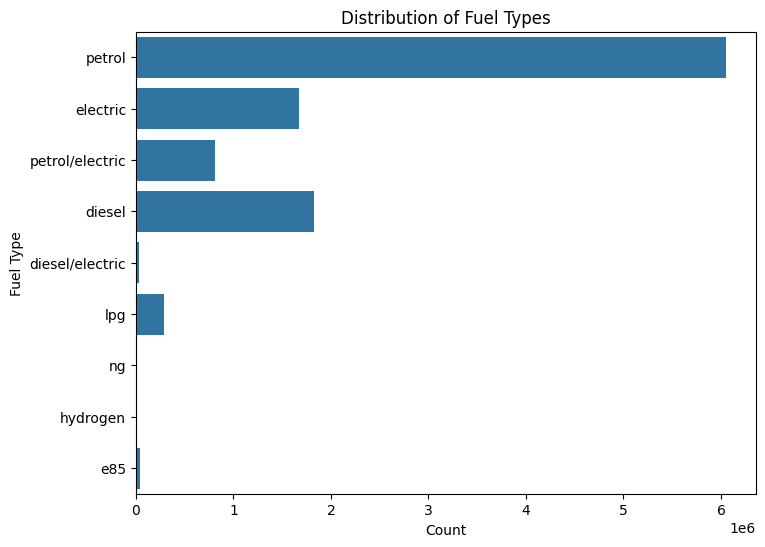

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(y="fuel_type", data=df)

plt.xlabel("Count")
plt.ylabel("Fuel Type")
plt.title("Distribution of Fuel Types")

Text(0.5, 1.0, 'Potential relationship of fuel_type to specific_co2_emissions')

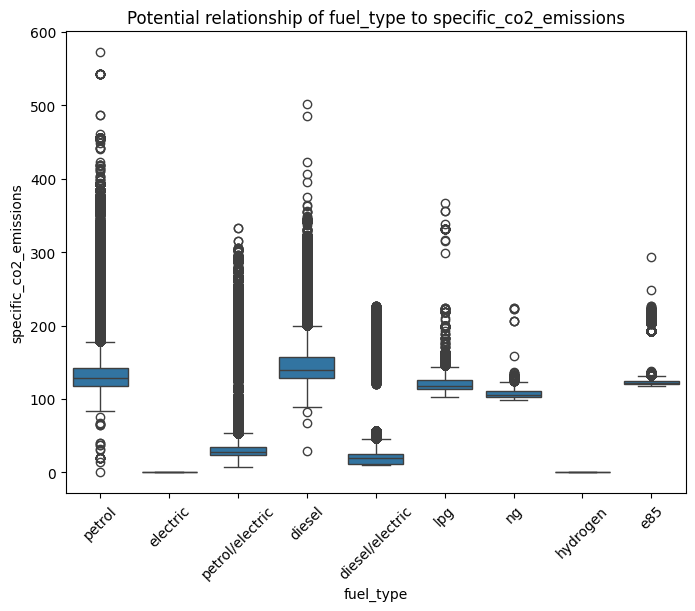

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x="fuel_type", y="specific_co2_emissions", data=df)

plt.xticks(rotation=45)
plt.xlabel("fuel_type")
plt.ylabel("specific_co2_emissions")
plt.title("Potential relationship of fuel_type to specific_co2_emissions")

---> specific_co2_emissions for fuel_type electric and hydrogen are always 0
* check fuel_type electric against electric_energy_consumption

Text(0.5, 1.0, 'Potential relationship of electric fuel_type to electric_energy_consumption')

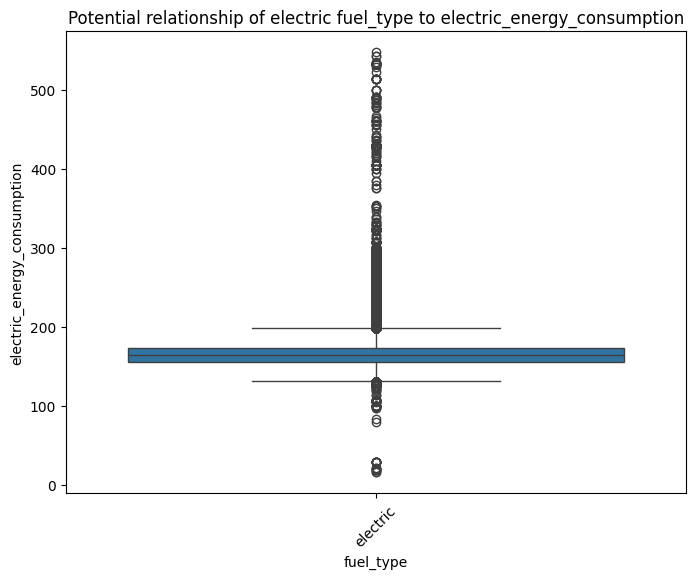

In [22]:
# take a deeper look into df_electric
import matplotlib.pyplot as plt

df_electric = df[df["fuel_type"] == "electric"]


plt.figure(figsize=(8, 6))
sns.boxplot(x="fuel_type", y="electric_energy_consumption", data=df_electric)

plt.xticks(rotation=45)
plt.xlabel("fuel_type")
plt.ylabel("electric_energy_consumption")
plt.title("Potential relationship of electric fuel_type to electric_energy_consumption")

In [23]:
# check missing percentage of electric_energy_consumption within df_electric
print("Missing percentage of electric_energy_consumption for fuel_type == electric:")
print(df_electric.isna().sum() / len(df_electric))

Missing percentage of electric_energy_consumption for fuel_type == electric:
category_of_vehicle            0.000000
fuel_type                      0.000000
fuel_mode                      0.000000
innovative_technologies        0.999890
mass_vehicle                   0.000037
weltp_test_mass                0.059688
engine_capacity                1.000000
engine_power                   0.026407
erwltp                         1.000000
year                           0.000000
electric_energy_consumption    0.028529
fuel_consumption               0.999995
specific_co2_emissions         0.000005
dtype: float64


--> 0.028529 don't have a value for electric_energy_consumption
* TODO's:
    * consider dropping rows with fuel_type electric that do not have electric_energy_consumption
    * discuss if electric_energy_consumption could be used somehow to allow comparison with specific_co2_emissions


In [24]:
# check how many cars have fuel_type hydroen
hydrogen_count = len(df[df["fuel_type"] == "hydrogen"])
print(f"{hydrogen_count} cars with fuel_type hydrogen")

730 cars with fuel_type hydrogen


---> TODO To be discussed
* I think we can remove hydrogen cars from our df as they are not representative

Drop innovative_technologies as it does not make sense to encode for now. Come back to innovative_technologies after discussion how we want to deal with that column.

In [25]:
print(f"Removing: innovative_technologies")
df = df.drop(columns=["innovative_technologies"])

Removing: innovative_technologies


## Analyze numerical variables

In [26]:
num_vars.columns

Index(['mass_vehicle', 'weltp_test_mass', 'engine_capacity', 'engine_power',
       'erwltp', 'year', 'electric_energy_consumption', 'fuel_consumption',
       'specific_co2_emissions'],
      dtype='object')

In [27]:
# TODO analyze numerical vars
num_vars.describe()

,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,electric_energy_consumption,fuel_consumption,specific_co2_emissions
count,1.073472e+07,1.057337e+07,9.064868e+06,1.068422e+07,6.944612e+06,10734898.0,2.436535e+06,8.845923e+06,1.072153e+07
mean,1.544584e+03,1.658169e+03,1.545022e+03,1.152157e+02,1.511407e+00,2023.0,1.720280e+02,5.445940e+00,1.065199e+02
std,3.603363e+02,3.768652e+02,5.281390e+02,6.291614e+01,5.086313e-01,0.0,2.847060e+01,1.765757e+00,5.962395e+01
min,4.950000e+02,6.150000e+02,6.580000e+02,8.000000e+00,5.000000e-01,2023.0,1.200000e+01,1.000000e-01,0.000000e+00
25%,1.270000e+03,1.375000e+03,1.197000e+03,7.400000e+01,1.080000e+00,2023.0,1.550000e+02,4.900000e+00,1.000000e+02
50%,1.478000e+03,1.585000e+03,1.497000e+03,1.000000e+02,1.700000e+00,2023.0,1.660000e+02,5.500000e+00,1.230000e+02
75%,1.760000e+03,1.890000e+03,1.968000e+03,1.320000e+02,1.960000e+00,2023.0,1.790000e+02,6.200000e+00,1.390000e+02
max,4.953000e+03,4.574000e+03,7.997000e+03,1.177000e+03,3.000000e+00,2023.0,6.000000e+02,2.520000e+01,5.720000e+02


In [28]:
# mass_vehicle

# sns.histplot(df["mass_vehicle"], kde=True)
# plt.show()

In [29]:
# tbd TODO discretize quantitative variables to make Machine Learning algorithms more efficient.

## Encoding and check correlations

In [30]:
# encoding of categorical vars


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_columns = pd.DataFrame.select_dtypes(df, include=["object"]).columns
quant_columns = df.select_dtypes(exclude=["object"]).columns


ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), cat_columns)], remainder="passthrough")
transformed_array = ct.fit_transform(df)
encoder_feature_names = ct.named_transformers_["encoder"].get_feature_names_out(cat_columns)

preserved_col_names = list(encoder_feature_names)
preserved_col_names.extend(list(quant_columns))

df = pd.DataFrame(transformed_array, columns=preserved_col_names)

### Check correlations

In [31]:
corr_matrix = df.corr()

<Axes: >

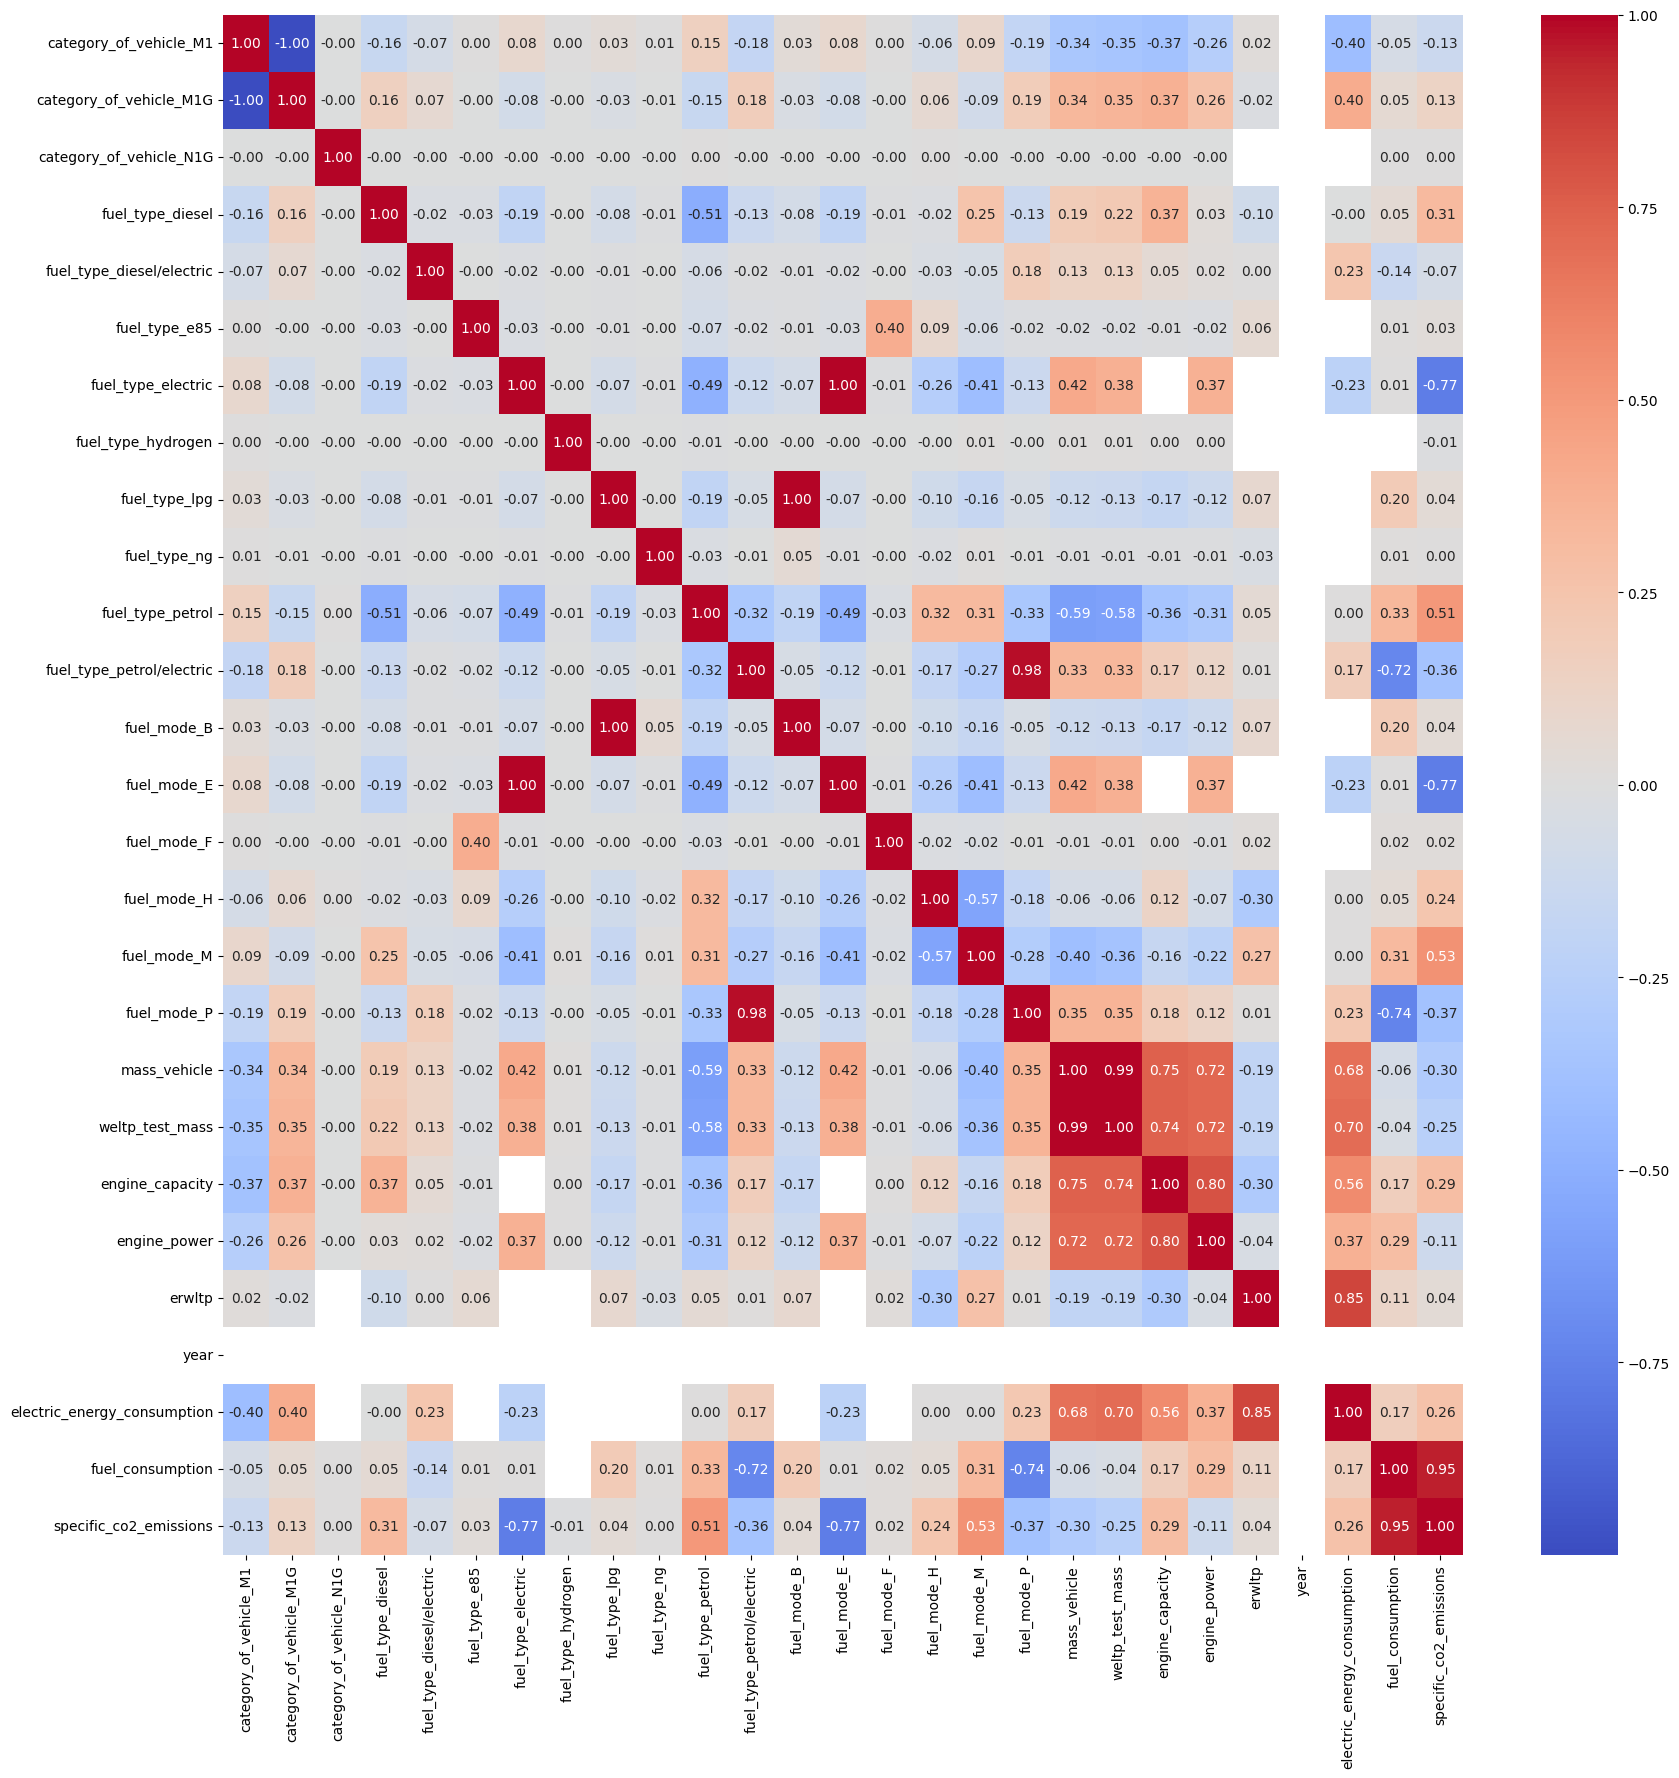

In [32]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

In [33]:
# check against target specific_co2_emissions
df.corr()["specific_co2_emissions"].sort_values(ascending=False)

specific_co2_emissions         1.000000
fuel_consumption               0.952457
fuel_mode_M                    0.532677
fuel_type_petrol               0.507336
fuel_type_diesel               0.313477
engine_capacity                0.290349
electric_energy_consumption    0.261026
fuel_mode_H                    0.236475
category_of_vehicle_M1G        0.131667
erwltp                         0.044795
fuel_type_lpg                  0.039464
fuel_mode_B                    0.039238
fuel_type_e85                  0.025449
fuel_mode_F                    0.017199
category_of_vehicle_N1G        0.000590
fuel_type_ng                   0.000174
fuel_type_hydrogen            -0.014742
fuel_type_diesel/electric     -0.065599
engine_power                  -0.114957
category_of_vehicle_M1        -0.131668
weltp_test_mass               -0.246702
mass_vehicle                  -0.295595
fuel_type_petrol/electric     -0.362640
fuel_mode_P                   -0.369533
fuel_type_electric            -0.767160


In [38]:
# check against target electric_energy_consumption
corr_table = df.corr()["electric_energy_consumption"].sort_values(ascending=False)
print(corr_table)
corr_table.to_csv("files/output/corr_table_electric_energy_consumption.csv")

electric_energy_consumption    1.000000
erwltp                         0.849686
weltp_test_mass                0.701070
mass_vehicle                   0.681787
engine_capacity                0.562835
category_of_vehicle_M1G        0.401917
engine_power                   0.370893
specific_co2_emissions         0.261026
fuel_type_diesel/electric      0.234702
fuel_mode_P                    0.225246
fuel_type_petrol/electric      0.174545
fuel_consumption               0.166262
fuel_type_petrol               0.003845
fuel_mode_M                    0.003337
fuel_mode_H                    0.000539
fuel_type_diesel              -0.000105
fuel_mode_E                   -0.225262
fuel_type_electric            -0.225262
category_of_vehicle_M1        -0.401917
category_of_vehicle_N1G             NaN
fuel_type_e85                       NaN
fuel_type_hydrogen                  NaN
fuel_type_lpg                       NaN
fuel_type_ng                        NaN
fuel_mode_B                         NaN


In [37]:
# check against target fuel_consumption
corr_table = df.corr()["fuel_consumption"].sort_values(ascending=False)
print(corr_table)
corr_table.to_csv("files/output/corr_table_fuel_consumption.csv")

fuel_consumption               1.000000
specific_co2_emissions         0.952457
fuel_type_petrol               0.332551
fuel_mode_M                    0.313180
engine_power                   0.289345
fuel_type_lpg                  0.196722
fuel_mode_B                    0.196261
engine_capacity                0.167810
electric_energy_consumption    0.166262
erwltp                         0.114981
category_of_vehicle_M1G        0.054935
fuel_type_diesel               0.049819
fuel_mode_H                    0.045211
fuel_mode_F                    0.016990
fuel_type_e85                  0.011612
fuel_type_ng                   0.008595
fuel_type_electric             0.005115
fuel_mode_E                    0.005115
category_of_vehicle_N1G        0.000743
weltp_test_mass               -0.042419
category_of_vehicle_M1        -0.054937
mass_vehicle                  -0.064268
fuel_type_diesel/electric     -0.142622
fuel_type_petrol/electric     -0.723054
fuel_mode_P                   -0.739298
